# Collaboration and Competition

---

This notebook runs John's solution for the third project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.  It uses the Unity ML-Agents environment to train two cooperative agents to play a tennis-like game.

**Need more description here - refer to readme?**






...


This code depends upon a custom Unity environment provided by the Udacity staff that embodies the variation on tennis.  It will open a separate Unity window for visualizing the environment as the agents train or play.


In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt
from unityagents import UnityEnvironment
from train import train
from maddpg import Maddpg

%matplotlib inline

# create a new Unity environment
# it needs to be done once, outside any loop, as closing an environment then restarting causes
# a Unity exception about the handle no longer being active.
env = UnityEnvironment(file_name="Tennis_Linux/Tennis.x86_64", seed=0, 
                       no_graphics=True)
brain_name = env.brain_names[0]
brain = env.brains[brain_name]                       
env_info = env.reset(train_mode=True)[brain_name]
num_agents = len(env_info.agents)
action_size = brain.vector_action_space_size
states = env_info.vector_observations
state_size = states.shape[1]


INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


## Train the agents

The next cells will invoke the training program to create the agents.  All of the real code is in Python flat files in this project directory.

In [2]:
import numpy as np

class RandomSampler():
    
    def __init__(self, vars):
        """Accepts definition of the set of variables to be sampled.
            
            Params:
                vars (list of lists): each item is a list containing:
                                        item 0 - either 'discrete', 'continuous-int' or 'continuous-float'
                                        items 1-N depend on the value of item 0:
                                        if discrete, then these are the set of values to be chosen from
                                        if continuous then these are the min & max bounds of the range
        """
        
        self.vars = vars
        
        self.rng = np.random.default_rng()
    
    
    def sample(self):
        """Draws a random sample of all variables at its disposal.
        
            Returns a list of values in the order of definition.
        """

        rtn = []
        for v in self.vars:
            if v[0] == "discrete":
                choice = self.rng.integers(low=1, high=len(v), size=1)[0]
                rtn.append(v[choice])
                
            elif v[0] == "continuous-int":
                choice = self.rng.integers(low=v[1], high=v[2], size=1)[0]
                rtn.append(choice)
                
            elif v[0] == "continuous-float":
                choice = self.rng.random() * (v[2]-v[1]) + v[1]
                rtn.append(choice)
            
            else:
                print("///// RandomSampler error:  unknown type ", v[0])
            
        return rtn
                
vars = [["discrete", 88, 66, 11, 22, 33, 44, 99, 101, 77],
        ["discrete", 500], #1-item list
        ["continuous-int", 43, 44], #1-item range
        ["continuous-int", 0, 10],
        ["continuous-float", 0.0, 1.0],
        ["continuous-float", -3.3, 0.0],
        ["continuous-float", -1.0, 6.4],
       ]
rs = RandomSampler(vars)

for i in range(3):
    out = rs.sample()
    print("\n", i, "\n", out)



 0 
 [101, 500, 43, 1, 0.37583837120125063, -2.3994641815242153, -0.0979457286865606]

 1 
 [88, 500, 43, 1, 0.7757695483065759, -0.870451213116695, 0.036063433599852424]

 2 
 [11, 500, 43, 7, 0.5598562089195692, -3.2893991136513683, 1.7032940495876994]


Ready to train M34 over 30 training sets for 15001 episodes each, with fixed params:
    Max episodes  =  15001
    Weight decay  =  0.0
    Gamma         =  0.99
    Buf prime size=  5000

///// Beginning training set  M34.00  with:
      Batch size       = 256
      Buffer size      = 100000
      Bad step prob    = 0.1000
      Noise decay      = 0.999979
      Noise scale      = 0.051
      LR actor         = 0.000037
      LR critic        = 0.000014
      Learning every      96  time steps
      Learn iterations =  2
      Tau              = 0.00224
      Seed             =  44939
2000	Average score:   0.025,        mem:   1861/   372 (20.0%), avg 1.0 eps/min; ???   
4000	Average score:   0.023,        mem:   3760/   793 (21.1%), avg 1.0 eps/min; ???   
5269	Running avg/max: 0.027/0.200,  mem:   4999/  1084 (21.7%), avg 1.0 eps/min   
* Replay buffer fully primed. Learning will commence.
6000	Average score:   0.000,        mem:   6140/  1085 (17.7%), avg 1646.7 eps/min;  0.1 hr r

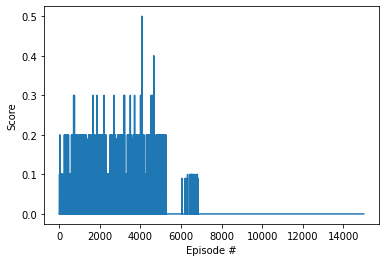


///// Beginning training set  M34.01  with:
      Batch size       = 64
      Buffer size      = 100000
      Bad step prob    = 0.1000
      Noise decay      = 0.999966
      Noise scale      = 0.054
      LR actor         = 0.000035
      LR critic        = 0.000014
      Learning every      92  time steps
      Learn iterations =  2
      Tau              = 0.00175
      Seed             =  44939
2000	Average score:   0.027,        mem:   1928/   411 (21.3%), avg 1.0 eps/min; ???   
4000	Average score:   0.028,        mem:   3778/   857 (22.7%), avg 1.0 eps/min; ???   
5236	Running avg/max: 0.029/0.300,  mem:   4997/  1151 (23.0%), avg 1.0 eps/min   
* Replay buffer fully primed. Learning will commence.
6000	Average score:   0.000,        mem:   6249/  1152 (18.4%), avg 1499.3 eps/min;  0.1 hr rem   
6658	Running avg/max: 0.001/0.090,  mem:   7424/  1156 (15.6%), avg 1466.7 eps/min   
* noise mult = 0.2
8000	Average score:   0.000,        mem:   9546/  1175 (12.3%), avg 1548.1 eps/

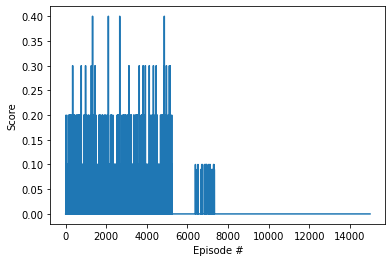


///// Beginning training set  M34.02  with:
      Batch size       = 128
      Buffer size      = 100000
      Bad step prob    = 0.1000
      Noise decay      = 0.999926
      Noise scale      = 0.039
      LR actor         = 0.000045
      LR critic        = 0.000016
      Learning every      91  time steps
      Learn iterations =  2
      Tau              = 0.00251
      Seed             =  44939
2000	Average score:   0.025,        mem:   1898/   403 (21.2%), avg 1.0 eps/min; ???   
4000	Average score:   0.026,        mem:   3722/   800 (21.5%), avg 1.0 eps/min; ???   
5404	Running avg/max: 0.018/0.100,  mem:   5000/  1079 (21.6%), avg 1.0 eps/min   
* Replay buffer fully primed. Learning will commence.
6000	Average score:   0.001,        mem:   6125/  1131 (18.5%), avg 1411.5 eps/min;  0.1 hr rem   
6019	Running avg/max: 0.001/0.100,  mem:   6147/  1131 (18.4%), avg 1415.7 eps/min   
* noise mult = 0.2
8000	Average score:   0.000,        mem:   9056/  1140 (12.6%), avg 1609.2 eps

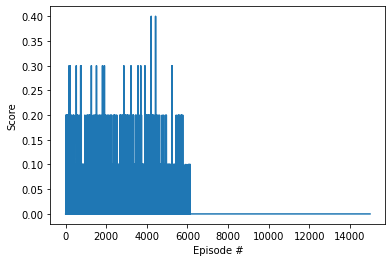


///// Beginning training set  M34.03  with:
      Batch size       = 128
      Buffer size      = 100000
      Bad step prob    = 0.1000
      Noise decay      = 0.999935
      Noise scale      = 0.040
      LR actor         = 0.000043
      LR critic        = 0.000012
      Learning every      90  time steps
      Learn iterations =  2
      Tau              = 0.00255
      Seed             =  44939
2000	Average score:   0.025,        mem:   1908/   415 (21.8%), avg 1.0 eps/min; ???   
4000	Average score:   0.018,        mem:   3771/   844 (22.4%), avg 1.0 eps/min; ???   
5362	Running avg/max: 0.031/0.200,  mem:   5000/  1094 (21.9%), avg 1.0 eps/min   
* Replay buffer fully primed. Learning will commence.
6000	Average score:   0.001,        mem:   6026/  1111 (18.4%), avg 1527.1 eps/min;  0.1 hr rem   
6161	Running avg/max: 0.000/0.000,  mem:   6269/  1111 (17.7%), avg 1558.5 eps/min   
* noise mult = 0.2
8000	Average score:   0.000,        mem:   8919/  1111 (12.5%), avg 1652.8 eps

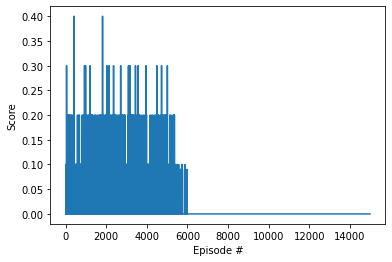


///// Beginning training set  M34.04  with:
      Batch size       = 128
      Buffer size      = 100000
      Bad step prob    = 0.1000
      Noise decay      = 0.999971
      Noise scale      = 0.049
      LR actor         = 0.000042
      LR critic        = 0.000011
      Learning every      100  time steps
      Learn iterations =  2
      Tau              = 0.00211
      Seed             =  44939
2000	Average score:   0.021,        mem:   1917/   407 (21.2%), avg 1.0 eps/min; ???   
4000	Average score:   0.019,        mem:   3780/   846 (22.4%), avg 1.0 eps/min; ???   
5314	Running avg/max: 0.027/0.400,  mem:   4999/  1130 (22.6%), avg 1.0 eps/min   
* Replay buffer fully primed. Learning will commence.
6000	Average score:   0.000,        mem:   6219/  1136 (18.3%), avg 1409.6 eps/min;  0.1 hr rem   
6933	Running avg/max: 0.000/0.000,  mem:   7810/  1158 (14.8%), avg 1468.7 eps/min   
* noise mult = 0.2
8000	Average score:   0.000,        mem:   9345/  1158 (12.4%), avg 1580.3 ep

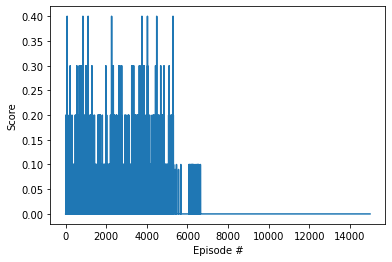


///// Beginning training set  M34.05  with:
      Batch size       = 128
      Buffer size      = 100000
      Bad step prob    = 0.1000
      Noise decay      = 0.999927
      Noise scale      = 0.046
      LR actor         = 0.000032
      LR critic        = 0.000011
      Learning every      96  time steps
      Learn iterations =  2
      Tau              = 0.00242
      Seed             =  44939
2000	Average score:   0.028,        mem:   1895/   422 (22.3%), avg 1.0 eps/min; ???   
4000	Average score:   0.015,        mem:   3766/   861 (22.9%), avg 1.0 eps/min; ???   
5319	Running avg/max: 0.030/0.300,  mem:   5000/  1154 (23.1%), avg 1.0 eps/min   
* Replay buffer fully primed. Learning will commence.
5941	Running avg/max: 0.002/0.090,  mem:   6148/  1204 (19.6%), avg 1426.6 eps/min   
* noise mult = 0.2
6000	Average score:   0.006,        mem:   6254/  1210 (19.3%), avg 1432.0 eps/min;  0.1 hr rem   
8000	Average score:   0.000,        mem:   9217/  1224 (13.3%), avg 1681.1 eps

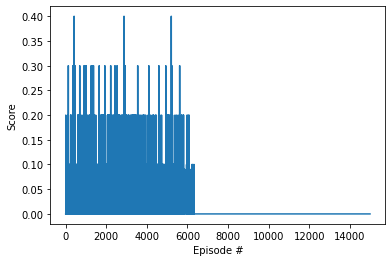


///// Beginning training set  M34.06  with:
      Batch size       = 64
      Buffer size      = 100000
      Bad step prob    = 0.1000
      Noise decay      = 0.999948
      Noise scale      = 0.045
      LR actor         = 0.000046
      LR critic        = 0.000014
      Learning every      98  time steps
      Learn iterations =  2
      Tau              = 0.00210
      Seed             =  44939
2000	Average score:   0.020,        mem:   1920/   447 (23.3%), avg 1.0 eps/min; ???   
4000	Average score:   0.025,        mem:   3823/   874 (22.9%), avg 1.0 eps/min; ???   
5258	Running avg/max: 0.021/0.300,  mem:   4999/  1138 (22.8%), avg 1.0 eps/min   
* Replay buffer fully primed. Learning will commence.
6000	Average score:   0.002,        mem:   6382/  1152 (18.1%), avg 1157.7 eps/min;  0.1 hr rem   
6136	Running avg/max: 0.001/0.100,  mem:   6600/  1153 (17.5%), avg 1172.0 eps/min   
* noise mult = 0.2
8000	Average score:   0.000,        mem:   9350/  1166 (12.5%), avg 1333.1 eps/

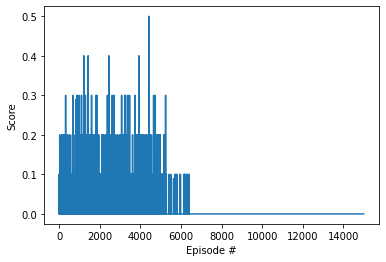


///// Beginning training set  M34.07  with:
      Batch size       = 64
      Buffer size      = 100000
      Bad step prob    = 0.1000
      Noise decay      = 0.999951
      Noise scale      = 0.040
      LR actor         = 0.000031
      LR critic        = 0.000011
      Learning every      95  time steps
      Learn iterations =  2
      Tau              = 0.00256
      Seed             =  44939
2000	Average score:   0.027,        mem:   1923/   417 (21.7%), avg 1.0 eps/min; ???   
4000	Average score:   0.020,        mem:   3824/   856 (22.4%), avg 1.0 eps/min; ???   
5222	Running avg/max: 0.020/0.300,  mem:   4997/  1132 (22.7%), avg 1.0 eps/min   
* Replay buffer fully primed. Learning will commence.
6000	Average score:   0.000,        mem:   6352/  1157 (18.2%), avg 1233.3 eps/min;  0.1 hr rem   
6182	Running avg/max: 0.003/0.090,  mem:   6680/  1162 (17.4%), avg 1228.8 eps/min   
* noise mult = 0.2
8000	Average score:   0.000,        mem:   9812/  1211 (12.3%), avg 1241.3 eps/

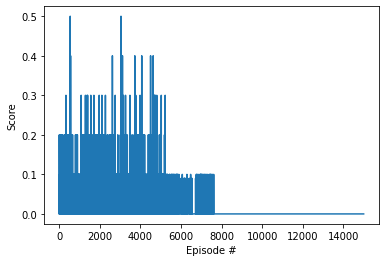


///// Beginning training set  M34.08  with:
      Batch size       = 64
      Buffer size      = 100000
      Bad step prob    = 0.1000
      Noise decay      = 0.999946
      Noise scale      = 0.052
      LR actor         = 0.000043
      LR critic        = 0.000010
      Learning every      79  time steps
      Learn iterations =  2
      Tau              = 0.00261
      Seed             =  44939
2000	Average score:   0.016,        mem:   1822/   373 (20.5%), avg 1.0 eps/min; ???   
4000	Average score:   0.024,        mem:   3689/   795 (21.6%), avg 1.0 eps/min; ???   
5392	Running avg/max: 0.018/0.200,  mem:   5000/  1086 (21.7%), avg 1.0 eps/min   
* Replay buffer fully primed. Learning will commence.
6000	Average score:   0.000,        mem:   6137/  1105 (18.0%), avg 1122.3 eps/min;  0.1 hr rem   
6255	Running avg/max: 0.000/0.000,  mem:   6534/  1105 (16.9%), avg 1180.5 eps/min   
* noise mult = 0.2
8000	Average score:   0.000,        mem:   9058/  1105 (12.2%), avg 1335.1 eps/

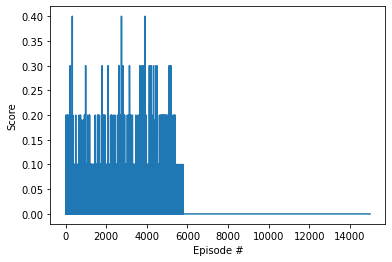


///// Beginning training set  M34.09  with:
      Batch size       = 64
      Buffer size      = 100000
      Bad step prob    = 0.1000
      Noise decay      = 0.999925
      Noise scale      = 0.053
      LR actor         = 0.000031
      LR critic        = 0.000015
      Learning every      89  time steps
      Learn iterations =  2
      Tau              = 0.00235
      Seed             =  44939
2000	Average score:   0.022,        mem:   1863/   401 (21.5%), avg 1.0 eps/min; ???   
4000	Average score:   0.029,        mem:   3746/   835 (22.3%), avg 1.0 eps/min; ???   
5351	Running avg/max: 0.021/0.300,  mem:   5000/  1103 (22.1%), avg 1.0 eps/min   
* Replay buffer fully primed. Learning will commence.
5891	Running avg/max: 0.006/0.100,  mem:   6127/  1146 (18.7%), avg 1045.9 eps/min   
* noise mult = 0.2
6000	Average score:   0.005,        mem:   6345/  1151 (18.1%), avg 1060.4 eps/min;  0.1 hr rem   
8000	Average score:   0.000,        mem:   9345/  1158 (12.4%), avg 1299.8 eps/

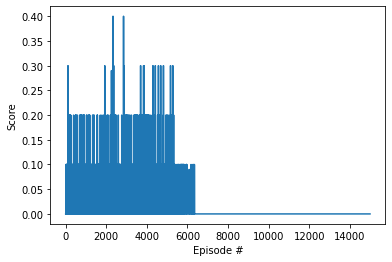


///// Beginning training set  M34.10  with:
      Batch size       = 256
      Buffer size      = 100000
      Bad step prob    = 0.1000
      Noise decay      = 0.999976
      Noise scale      = 0.040
      LR actor         = 0.000040
      LR critic        = 0.000011
      Learning every      87  time steps
      Learn iterations =  2
      Tau              = 0.00219
      Seed             =  44939
2000	Average score:   0.016,        mem:   1932/   375 (19.4%), avg 1.0 eps/min; ???   
4000	Average score:   0.027,        mem:   3759/   760 (20.2%), avg 1.0 eps/min; ???   
5273	Running avg/max: 0.017/0.200,  mem:   4997/  1046 (20.9%), avg 1.0 eps/min   
* Replay buffer fully primed. Learning will commence.
6000	Average score:   0.001,        mem:   6192/  1048 (16.9%), avg 1246.7 eps/min;  0.1 hr rem   
7460	Running avg/max: 0.000/0.000,  mem:   8455/  1059 (12.5%), avg 1298.0 eps/min   
* noise mult = 0.2
8000	Average score:   0.000,        mem:   9223/  1059 (11.5%), avg 1318.1 eps

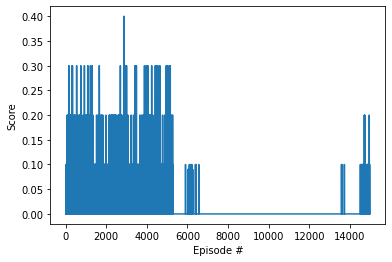


///// Beginning training set  M34.11  with:
      Batch size       = 128
      Buffer size      = 100000
      Bad step prob    = 0.1000
      Noise decay      = 0.999942
      Noise scale      = 0.041
      LR actor         = 0.000041
      LR critic        = 0.000014
      Learning every      75  time steps
      Learn iterations =  2
      Tau              = 0.00239
      Seed             =  44939
2000	Average score:   0.026,        mem:   1867/   403 (21.6%), avg 1.0 eps/min; ???   
4000	Average score:   0.026,        mem:   3820/   864 (22.6%), avg 1.0 eps/min; ???   
5199	Running avg/max: 0.018/0.100,  mem:   4999/  1115 (22.3%), avg 1.0 eps/min   
* Replay buffer fully primed. Learning will commence.
6000	Average score:   0.000,        mem:   6377/  1131 (17.7%), avg 1224.0 eps/min;  0.1 hr rem   
6038	Running avg/max: 0.000/0.000,  mem:   6421/  1131 (17.6%), avg 1236.0 eps/min   
* noise mult = 0.2
8000	Average score:   0.000,        mem:   9261/  1131 (12.2%), avg 1359.8 eps

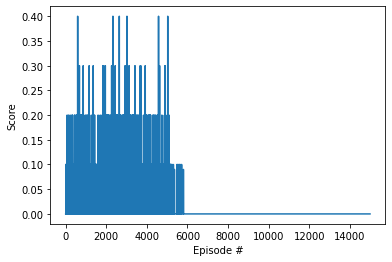


///// Beginning training set  M34.12  with:
      Batch size       = 256
      Buffer size      = 100000
      Bad step prob    = 0.1000
      Noise decay      = 0.999978
      Noise scale      = 0.044
      LR actor         = 0.000046
      LR critic        = 0.000012
      Learning every      89  time steps
      Learn iterations =  2
      Tau              = 0.00253
      Seed             =  44939
2000	Average score:   0.021,        mem:   1858/   378 (20.3%), avg 1.0 eps/min; ???   
4000	Average score:   0.029,        mem:   3793/   829 (21.9%), avg 1.0 eps/min; ???   
5300	Running avg/max: 0.019/0.300,  mem:   5000/  1086 (21.7%), avg 1.0 eps/min   
* Replay buffer fully primed. Learning will commence.
6000	Average score:   0.007,        mem:   6272/  1096 (17.5%), avg 1132.3 eps/min;  0.1 hr rem   
7594	Running avg/max: 0.000/0.000,  mem:   8725/  1115 (12.8%), avg 1270.7 eps/min   
* noise mult = 0.2
8000	Average score:   0.000,        mem:   9310/  1115 (12.0%), avg 1289.6 eps

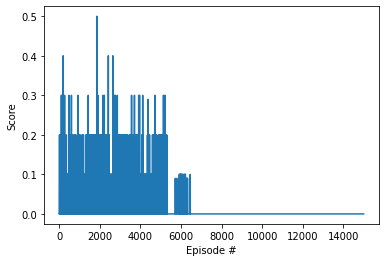


///// Beginning training set  M34.13  with:
      Batch size       = 64
      Buffer size      = 100000
      Bad step prob    = 0.1000
      Noise decay      = 0.999944
      Noise scale      = 0.046
      LR actor         = 0.000039
      LR critic        = 0.000012
      Learning every      85  time steps
      Learn iterations =  2
      Tau              = 0.00233
      Seed             =  44939
2000	Average score:   0.025,        mem:   1946/   422 (21.7%), avg 1.0 eps/min; ???   
4000	Average score:   0.024,        mem:   3800/   856 (22.5%), avg 1.0 eps/min; ???   
5275	Running avg/max: 0.015/0.300,  mem:   5000/  1117 (22.3%), avg 1.0 eps/min   
* Replay buffer fully primed. Learning will commence.
6000	Average score:   0.000,        mem:   6217/  1161 (18.7%), avg 1275.4 eps/min;  0.1 hr rem   
6192	Running avg/max: 0.000/0.000,  mem:   6497/  1161 (17.9%), avg 1312.9 eps/min   
* noise mult = 0.2
8000	Average score:   0.000,        mem:   9104/  1161 (12.8%), avg 1396.6 eps/

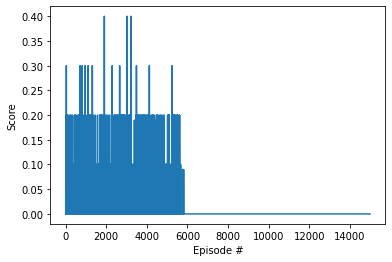


///// Beginning training set  M34.14  with:
      Batch size       = 128
      Buffer size      = 100000
      Bad step prob    = 0.1000
      Noise decay      = 0.999977
      Noise scale      = 0.053
      LR actor         = 0.000040
      LR critic        = 0.000011
      Learning every      75  time steps
      Learn iterations =  2
      Tau              = 0.00222
      Seed             =  44939
2000	Average score:   0.029,        mem:   1918/   444 (23.1%), avg 1.0 eps/min; ???   
4000	Average score:   0.021,        mem:   3806/   861 (22.6%), avg 1.0 eps/min; ???   
5238	Running avg/max: 0.020/0.200,  mem:   4998/  1146 (22.9%), avg 1.0 eps/min   
* Replay buffer fully primed. Learning will commence.
6000	Average score:   0.000,        mem:   6221/  1168 (18.8%), avg 1307.6 eps/min;  0.1 hr rem   
7624	Running avg/max: 0.000/0.000,  mem:   8571/  1168 (13.6%), avg 1378.1 eps/min   
* noise mult = 0.2
8000	Average score:   0.000,        mem:   9096/  1168 (12.8%), avg 1381.9 eps

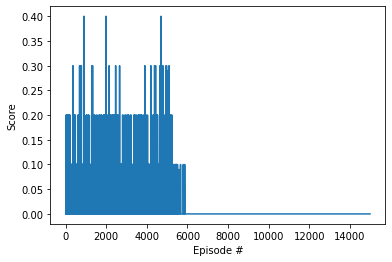


///// Beginning training set  M34.15  with:
      Batch size       = 256
      Buffer size      = 100000
      Bad step prob    = 0.1000
      Noise decay      = 0.999956
      Noise scale      = 0.038
      LR actor         = 0.000041
      LR critic        = 0.000013
      Learning every      98  time steps
      Learn iterations =  2
      Tau              = 0.00229
      Seed             =  44939
2000	Average score:   0.022,        mem:   1826/   333 (18.2%), avg 1.0 eps/min; ???   
4000	Average score:   0.019,        mem:   3752/   753 (20.1%), avg 1.0 eps/min; ???   
5233	Running avg/max: 0.030/0.500,  mem:   5000/  1046 (20.9%), avg 1.0 eps/min   
* Replay buffer fully primed. Learning will commence.
6000	Average score:   0.004,        mem:   6407/  1069 (16.7%), avg 1111.5 eps/min;  0.1 hr rem   
6267	Running avg/max: 0.006/0.100,  mem:   6867/  1079 (15.7%), avg 1127.2 eps/min   
* noise mult = 0.2
8000	Average score:   0.000,        mem:   9489/  1108 (11.7%), avg 1265.7 eps

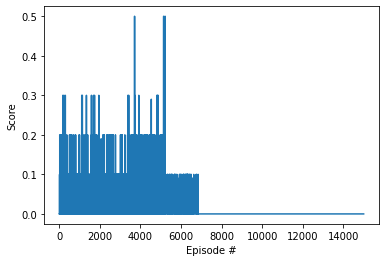


///// Beginning training set  M34.16  with:
      Batch size       = 256
      Buffer size      = 100000
      Bad step prob    = 0.1000
      Noise decay      = 0.999973
      Noise scale      = 0.038
      LR actor         = 0.000040
      LR critic        = 0.000012
      Learning every      81  time steps
      Learn iterations =  2
      Tau              = 0.00234
      Seed             =  44939
2000	Average score:   0.022,        mem:   1969/   403 (20.5%), avg 1.0 eps/min; ???   
4000	Average score:   0.032,        mem:   3798/   809 (21.3%), avg 1.0 eps/min; ???   
5223	Running avg/max: 0.021/0.300,  mem:   4998/  1078 (21.6%), avg 1.0 eps/min   
* Replay buffer fully primed. Learning will commence.
6000	Average score:   0.000,        mem:   6420/  1094 (17.0%), avg 1144.9 eps/min;  0.1 hr rem   
7010	Running avg/max: 0.000/0.000,  mem:   8014/  1095 (13.7%), avg 1210.0 eps/min   
* noise mult = 0.2
8000	Average score:   0.000,        mem:   9446/  1095 (11.6%), avg 1273.5 eps

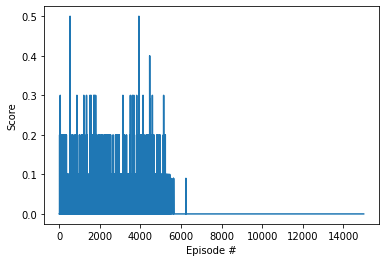


///// Beginning training set  M34.17  with:
      Batch size       = 256
      Buffer size      = 100000
      Bad step prob    = 0.1000
      Noise decay      = 0.999963
      Noise scale      = 0.044
      LR actor         = 0.000034
      LR critic        = 0.000012
      Learning every      89  time steps
      Learn iterations =  2
      Tau              = 0.00196
      Seed             =  44939
2000	Average score:   0.023,        mem:   1947/   398 (20.4%), avg 1.0 eps/min; ???   
4000	Average score:   0.025,        mem:   3868/   839 (21.7%), avg 1.0 eps/min; ???   
5232	Running avg/max: 0.013/0.200,  mem:   5000/  1090 (21.8%), avg 1.0 eps/min   
* Replay buffer fully primed. Learning will commence.
6000	Average score:   0.004,        mem:   6520/  1124 (17.2%), avg 1104.7 eps/min;  0.1 hr rem   
6391	Running avg/max: 0.000/0.000,  mem:   7210/  1124 (15.6%), avg 1106.0 eps/min   
* noise mult = 0.2
8000	Average score:   0.000,        mem:   9591/  1124 (11.7%), avg 1255.1 eps

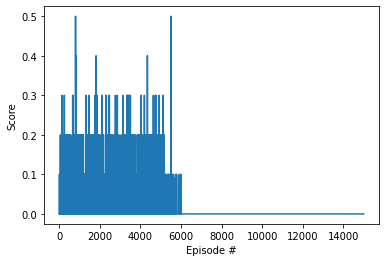


///// Beginning training set  M34.18  with:
      Batch size       = 128
      Buffer size      = 100000
      Bad step prob    = 0.1000
      Noise decay      = 0.999965
      Noise scale      = 0.041
      LR actor         = 0.000039
      LR critic        = 0.000013
      Learning every      96  time steps
      Learn iterations =  2
      Tau              = 0.00218
      Seed             =  44939
2000	Average score:   0.015,        mem:   1863/   378 (20.3%), avg 1.0 eps/min; ???   
4000	Average score:   0.021,        mem:   3650/   767 (21.0%), avg 1.0 eps/min; ???   
5464	Running avg/max: 0.024/0.300,  mem:   4998/  1079 (21.6%), avg 1.0 eps/min   
* Replay buffer fully primed. Learning will commence.
6000	Average score:   0.001,        mem:   6049/  1089 (18.0%), avg 1096.8 eps/min;  0.1 hr rem   
6682	Running avg/max: 0.000/0.000,  mem:   7351/  1112 (15.1%), avg 1118.0 eps/min   
* noise mult = 0.2
8000	Average score:   0.000,        mem:   9445/  1141 (12.1%), avg 1223.9 eps

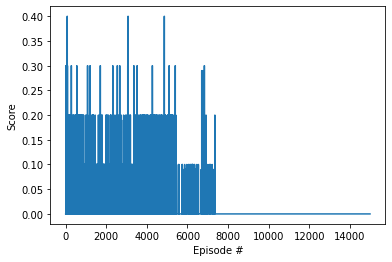


///// Beginning training set  M34.19  with:
      Batch size       = 64
      Buffer size      = 100000
      Bad step prob    = 0.1000
      Noise decay      = 0.999946
      Noise scale      = 0.049
      LR actor         = 0.000039
      LR critic        = 0.000013
      Learning every      81  time steps
      Learn iterations =  2
      Tau              = 0.00188
      Seed             =  44939
2000	Average score:   0.023,        mem:   1793/   382 (21.3%), avg 1.0 eps/min; ???   
4000	Average score:   0.021,        mem:   3692/   836 (22.6%), avg 1.0 eps/min; ???   
5366	Running avg/max: 0.015/0.200,  mem:   5000/  1133 (22.7%), avg 1.0 eps/min   
* Replay buffer fully primed. Learning will commence.
6000	Average score:   0.002,        mem:   6251/  1155 (18.5%), avg 1088.0 eps/min;  0.1 hr rem   
6152	Running avg/max: 0.000/0.000,  mem:   6527/  1155 (17.7%), avg 1105.6 eps/min   
* noise mult = 0.2
8000	Average score:   0.000,        mem:   9309/  1155 (12.4%), avg 1289.1 eps/

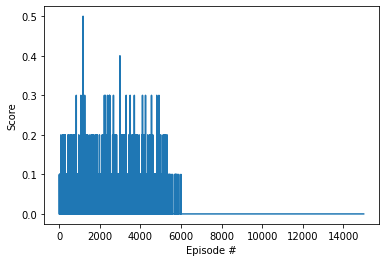


///// Beginning training set  M34.20  with:
      Batch size       = 256
      Buffer size      = 100000
      Bad step prob    = 0.1000
      Noise decay      = 0.999939
      Noise scale      = 0.047
      LR actor         = 0.000038
      LR critic        = 0.000015
      Learning every      96  time steps
      Learn iterations =  2
      Tau              = 0.00250
      Seed             =  44939
2000	Average score:   0.018,        mem:   1901/   399 (21.0%), avg 1.0 eps/min; ???   
4000	Average score:   0.018,        mem:   3772/   852 (22.6%), avg 1.0 eps/min; ???   
5285	Running avg/max: 0.026/0.200,  mem:   4999/  1155 (23.1%), avg 1.0 eps/min   
* Replay buffer fully primed. Learning will commence.
6000	Average score:   0.005,        mem:   6363/  1206 (19.0%), avg 1086.7 eps/min;  0.1 hr rem   
6004	Running avg/max: 0.005/0.200,  mem:   6367/  1206 (18.9%), avg 1087.7 eps/min   
* noise mult = 0.2
8000	Average score:   0.000,        mem:   9386/  1210 (12.9%), avg 1274.8 eps

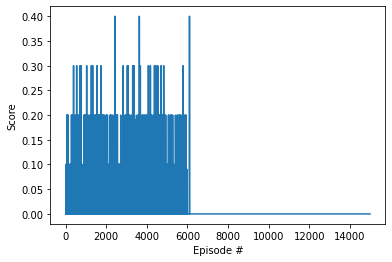


///// Beginning training set  M34.21  with:
      Batch size       = 64
      Buffer size      = 100000
      Bad step prob    = 0.1000
      Noise decay      = 0.999962
      Noise scale      = 0.039
      LR actor         = 0.000042
      LR critic        = 0.000016
      Learning every      79  time steps
      Learn iterations =  2
      Tau              = 0.00230
      Seed             =  44939
2000	Average score:   0.017,        mem:   1883/   417 (22.1%), avg 1.0 eps/min; ???   
4000	Average score:   0.024,        mem:   3684/   810 (22.0%), avg 1.0 eps/min; ???   
5407	Running avg/max: 0.020/0.300,  mem:   4999/  1120 (22.4%), avg 1.0 eps/min   
* Replay buffer fully primed. Learning will commence.
6000	Average score:   0.003,        mem:   6219/  1156 (18.6%), avg 1060.0 eps/min;  0.1 hr rem   
6618	Running avg/max: 0.000/0.000,  mem:   7189/  1162 (16.2%), avg 1205.7 eps/min   
* noise mult = 0.2
8000	Average score:   0.000,        mem:   9184/  1162 (12.7%), avg 1315.3 eps/

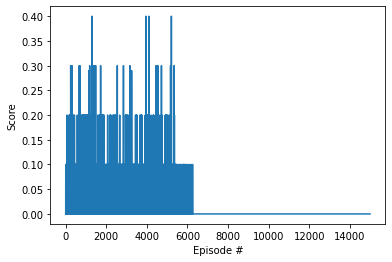


///// Beginning training set  M34.22  with:
      Batch size       = 256
      Buffer size      = 100000
      Bad step prob    = 0.1000
      Noise decay      = 0.999927
      Noise scale      = 0.052
      LR actor         = 0.000031
      LR critic        = 0.000015
      Learning every      82  time steps
      Learn iterations =  2
      Tau              = 0.00175
      Seed             =  44939
2000	Average score:   0.025,        mem:   2020/   421 (20.8%), avg 1.0 eps/min; ???   
4000	Average score:   0.014,        mem:   3853/   811 (21.0%), avg 1.0 eps/min; ???   
5148	Running avg/max: 0.022/0.100,  mem:   4999/  1079 (21.6%), avg 1.0 eps/min   
* Replay buffer fully primed. Learning will commence.
5872	Running avg/max: 0.000/0.000,  mem:   6116/  1095 (17.9%), avg 1338.2 eps/min   
* noise mult = 0.2
6000	Average score:   0.000,        mem:   6307/  1095 (17.4%), avg 1356.5 eps/min;  0.1 hr rem   
8000	Average score:   0.000,        mem:   9212/  1095 (11.9%), avg 1373.0 eps

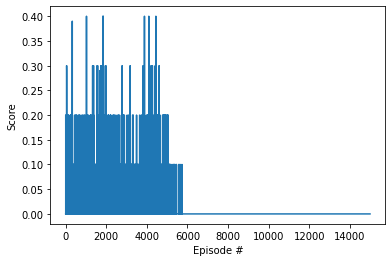


///// Beginning training set  M34.23  with:
      Batch size       = 256
      Buffer size      = 100000
      Bad step prob    = 0.1000
      Noise decay      = 0.999978
      Noise scale      = 0.051
      LR actor         = 0.000036
      LR critic        = 0.000011
      Learning every      89  time steps
      Learn iterations =  2
      Tau              = 0.00187
      Seed             =  44939
2000	Average score:   0.018,        mem:   1900/   369 (19.4%), avg 1.0 eps/min; ???   
4000	Average score:   0.016,        mem:   3741/   802 (21.4%), avg 1.0 eps/min; ???   
5392	Running avg/max: 0.009/0.100,  mem:   4998/  1077 (21.5%), avg 1.0 eps/min   
* Replay buffer fully primed. Learning will commence.
6000	Average score:   0.007,        mem:   6166/  1099 (17.8%), avg 1122.0 eps/min;  0.1 hr rem   
7613	Running avg/max: 0.000/0.000,  mem:   8769/  1139 (13.0%), avg 1217.3 eps/min   
* noise mult = 0.2
8000	Average score:   0.000,        mem:   9346/  1139 (12.2%), avg 1237.4 eps

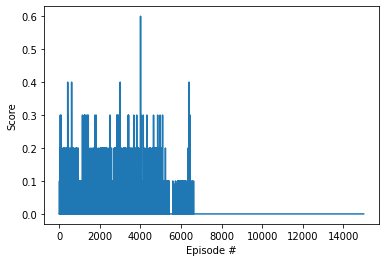


///// Beginning training set  M34.24  with:
      Batch size       = 128
      Buffer size      = 100000
      Bad step prob    = 0.1000
      Noise decay      = 0.999926
      Noise scale      = 0.040
      LR actor         = 0.000040
      LR critic        = 0.000011
      Learning every      83  time steps
      Learn iterations =  2
      Tau              = 0.00257
      Seed             =  44939
2000	Average score:   0.024,        mem:   1886/   420 (22.3%), avg 1.0 eps/min; ???   
4000	Average score:   0.011,        mem:   3747/   823 (22.0%), avg 1.0 eps/min; ???   
5284	Running avg/max: 0.030/0.200,  mem:   4994/  1108 (22.2%), avg 1.0 eps/min   
* Replay buffer fully primed. Learning will commence.
5913	Running avg/max: 0.002/0.100,  mem:   6121/  1129 (18.4%), avg 1182.1 eps/min   
* noise mult = 0.2
6000	Average score:   0.002,        mem:   6284/  1131 (18.0%), avg 1191.5 eps/min;  0.1 hr rem   
8000	Average score:   0.000,        mem:   9433/  1137 (12.1%), avg 1304.6 eps

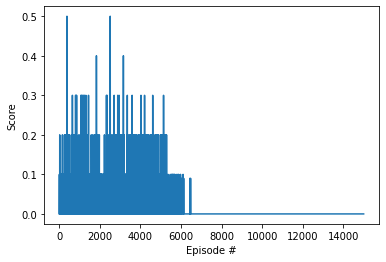


///// Beginning training set  M34.25  with:
      Batch size       = 256
      Buffer size      = 100000
      Bad step prob    = 0.1000
      Noise decay      = 0.999967
      Noise scale      = 0.045
      LR actor         = 0.000033
      LR critic        = 0.000014
      Learning every      86  time steps
      Learn iterations =  2
      Tau              = 0.00260
      Seed             =  44939
2000	Average score:   0.026,        mem:   1978/   407 (20.6%), avg 1.0 eps/min; ???   
4000	Average score:   0.019,        mem:   3778/   805 (21.3%), avg 1.0 eps/min; ???   
5237	Running avg/max: 0.032/0.300,  mem:   4999/  1082 (21.6%), avg 1.0 eps/min   
* Replay buffer fully primed. Learning will commence.
6000	Average score:   0.006,        mem:   6371/  1122 (17.6%), avg 1188.4 eps/min;  0.1 hr rem   
6752	Running avg/max: 0.000/0.000,  mem:   7472/  1127 (15.1%), avg 1279.3 eps/min   
* noise mult = 0.2
8000	Average score:   0.000,        mem:   9279/  1127 (12.1%), avg 1321.0 eps

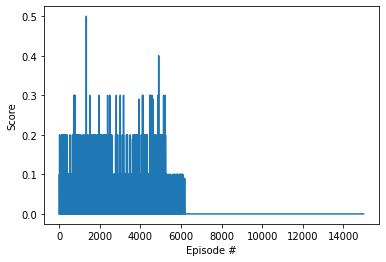


///// Beginning training set  M34.26  with:
      Batch size       = 128
      Buffer size      = 100000
      Bad step prob    = 0.1000
      Noise decay      = 0.999976
      Noise scale      = 0.053
      LR actor         = 0.000038
      LR critic        = 0.000011
      Learning every      77  time steps
      Learn iterations =  2
      Tau              = 0.00218
      Seed             =  44939
2000	Average score:   0.015,        mem:   1903/   387 (20.3%), avg 1.0 eps/min; ???   
4000	Average score:   0.028,        mem:   3849/   835 (21.7%), avg 1.0 eps/min; ???   
5251	Running avg/max: 0.020/0.300,  mem:   5001/  1076 (21.5%), avg 1.0 eps/min   
* Replay buffer fully primed. Learning will commence.
6000	Average score:   0.000,        mem:   6327/  1111 (17.6%), avg 1057.2 eps/min;  0.1 hr rem   
7448	Running avg/max: 0.000/0.000,  mem:   8500/  1114 (13.1%), avg 1210.9 eps/min   
* noise mult = 0.2
8000	Average score:   0.000,        mem:   9286/  1114 (12.0%), avg 1247.4 eps

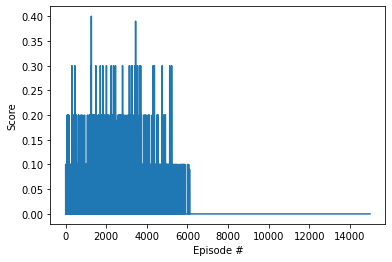


///// Beginning training set  M34.27  with:
      Batch size       = 64
      Buffer size      = 100000
      Bad step prob    = 0.1000
      Noise decay      = 0.999958
      Noise scale      = 0.053
      LR actor         = 0.000042
      LR critic        = 0.000013
      Learning every      85  time steps
      Learn iterations =  2
      Tau              = 0.00211
      Seed             =  44939
2000	Average score:   0.014,        mem:   1901/   439 (23.1%), avg 1.0 eps/min; ???   
4000	Average score:   0.025,        mem:   3787/   851 (22.5%), avg 1.0 eps/min; ???   
5217	Running avg/max: 0.022/0.200,  mem:   5000/  1139 (22.8%), avg 1.0 eps/min   
* Replay buffer fully primed. Learning will commence.
6000	Average score:   0.001,        mem:   6505/  1165 (17.9%), avg 1117.9 eps/min;  0.1 hr rem   
6286	Running avg/max: 0.000/0.000,  mem:   6931/  1166 (16.8%), avg 1169.8 eps/min   
* noise mult = 0.2
8000	Average score:   0.000,        mem:   9422/  1166 (12.4%), avg 1327.7 eps/

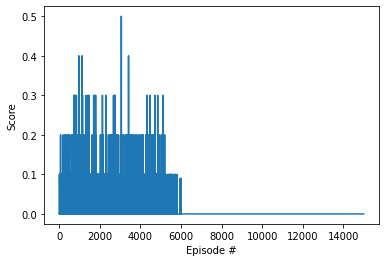


///// Beginning training set  M34.28  with:
      Batch size       = 128
      Buffer size      = 100000
      Bad step prob    = 0.1000
      Noise decay      = 0.999966
      Noise scale      = 0.050
      LR actor         = 0.000045
      LR critic        = 0.000011
      Learning every      75  time steps
      Learn iterations =  2
      Tau              = 0.00249
      Seed             =  44939
2000	Average score:   0.023,        mem:   1886/   388 (20.6%), avg 1.0 eps/min; ???   
4000	Average score:   0.015,        mem:   3781/   825 (21.8%), avg 1.0 eps/min; ???   
5249	Running avg/max: 0.022/0.200,  mem:   5000/  1094 (21.9%), avg 1.0 eps/min   
* Replay buffer fully primed. Learning will commence.
6000	Average score:   0.000,        mem:   6240/  1124 (18.0%), avg 1275.5 eps/min;  0.1 hr rem   
6800	Running avg/max: 0.000/0.000,  mem:   7375/  1124 (15.2%), avg 1362.7 eps/min   
* noise mult = 0.2
8000	Average score:   0.000,        mem:   9140/  1124 (12.3%), avg 1383.4 eps

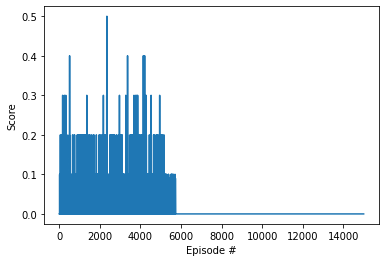


///// Beginning training set  M34.29  with:
      Batch size       = 128
      Buffer size      = 100000
      Bad step prob    = 0.1000
      Noise decay      = 0.999979
      Noise scale      = 0.052
      LR actor         = 0.000039
      LR critic        = 0.000012
      Learning every      82  time steps
      Learn iterations =  2
      Tau              = 0.00246
      Seed             =  44939
2000	Average score:   0.021,        mem:   1862/   370 (19.9%), avg 1.0 eps/min; ???   
4000	Average score:   0.021,        mem:   3786/   823 (21.7%), avg 1.0 eps/min; ???   
5250	Running avg/max: 0.026/0.300,  mem:   5000/  1113 (22.3%), avg 1.0 eps/min   
* Replay buffer fully primed. Learning will commence.
6000	Average score:   0.011,        mem:   6497/  1181 (18.2%), avg 1101.0 eps/min;  0.1 hr rem   
7545	Running avg/max: 0.000/0.000,  mem:   9026/  1209 (13.4%), avg 1220.6 eps/min   
* noise mult = 0.2
8000	Average score:   0.000,        mem:   9674/  1209 (12.5%), avg 1251.0 eps

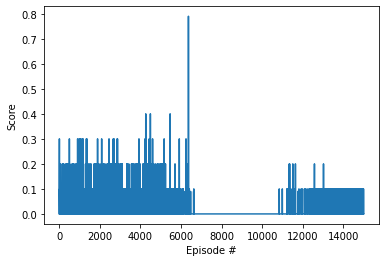



DONE!


In [3]:
# This cell will explore several combinations of hyperparams by training all of them
# Use a random search for the hyperparams

EXPLORE = True

TIME_STEPS         = 400
SAVE_ANALYSIS      = False
MODEL_DISPLAY_STEP = 0 #200k is approx 10k episodes at bad_step_prob = 0.01

if EXPLORE:
    
    # fixed for the session:
    RUN_PREFIX        = "M34"
    EPISODES          = 15001
    NUM_RUNS          = 30
    BAD_STEP_PROB     = 0.1
    BUFFER_PRIME_SIZE = 5000
    WEIGHT_DECAY      = 0.0 #was 1.0e-5
    GAMMA             = 0.99
    SEED              = 44939 #(0, 111, 468, 5555, 23100, 44939)
    
    # session variables:
    vars = [
            ["continuous-float", 0.15,     0.23],     #BAD_STEP_PROB
            ["continuous-float", 0.999924, 0.999980], #NOISE_DECAY
            ["continuous-float", 0.036,    0.054],    #NOISE_SCALE
            ["continuous-float", 0.000030, 0.000046], #LR_ACTOR
            ["continuous-float", 0.000010, 0.000016], #LR_CRITIC
            ["continuous-int",   75,       101],      #LEARN_EVERY
            ["continuous-int",   2,        3],        #LEARN_ITER
            ["continuous-float", 0.00174,  0.00262],  #TAU
            ["discrete",         64, 128, 256]        #BATCH
           ]
    rs = RandomSampler(vars)
    
    print("Ready to train {} over {} training sets for {} episodes each, with fixed params:"
          .format(RUN_PREFIX, NUM_RUNS, EPISODES))
    print("    Max episodes  = ", EPISODES)
    print("    Weight decay  = ", WEIGHT_DECAY)
    print("    Gamma         = ", GAMMA)
    print("    Buf prime size= ", BUFFER_PRIME_SIZE)
            
    for set_id in range(NUM_RUNS):
        
        # sample the variables
        v = rs.sample()
        #BAD_STEP_PROB = v[0]
        NOISE_DECAY   = v[1]
        NOISE_SCALE   = v[2]
        LR_ACTOR      = v[3]
        LR_CRITIC     = v[4]
        LEARN_EVERY   = v[5]
        LEARN_ITER    = v[6]
        TAU           = v[7]
        BATCH         = v[8]

        # set the replay buffer size to that it fills after ~5000 bad episodes
        # (at ~14 experiences/episode), based on the bad step retention rate
        #buffer_size = int(60000 - 50000*(1.0 - BAD_STEP_PROB))
        buffer_size = 100000

        RUN_NAME = "{}.{:02d}".format(RUN_PREFIX, set_id)
        print("\n///// Beginning training set ", RUN_NAME, " with:")
        print("      Batch size       = {:d}".format(BATCH))
        print("      Buffer size      = {:d}".format(buffer_size))
        print("      Bad step prob    = {:.4f}".format(BAD_STEP_PROB))
        print("      Noise decay      = {:.6f}".format(NOISE_DECAY))
        print("      Noise scale      = {:.3f}".format(NOISE_SCALE))
        print("      LR actor         = {:.6f}".format(LR_ACTOR))
        print("      LR critic        = {:.6f}".format(LR_CRITIC))
        print("      Learning every     ", LEARN_EVERY, " time steps")
        print("      Learn iterations = ", LEARN_ITER)
        print("      Tau              = {:.5f}".format(TAU))
        print("      Seed             = ", SEED)

        ##### instantiate the agents and perform the training

        maddpg = Maddpg(state_size, action_size, 2, bad_step_prob=BAD_STEP_PROB,
                        random_seed=SEED, batch_size=BATCH, buffer_size=buffer_size,
                        noise_decay=NOISE_DECAY, buffer_prime_size=BUFFER_PRIME_SIZE,
                        learn_every=LEARN_EVERY, 
                        learn_iter=LEARN_ITER, lr_actor=LR_ACTOR, lr_critic=LR_CRITIC,
                        weight_decay=WEIGHT_DECAY, gamma=GAMMA, noise_scale=NOISE_SCALE,
                        tau=TAU, model_display_step=MODEL_DISPLAY_STEP)

        scores = train(maddpg, env, run_name=RUN_NAME, max_episodes=EPISODES, 
                       winning_score=0.5, max_time_steps=TIME_STEPS,
                       checkpoint_interval=2000)

        ##### plot the training reward history

        fig = plt.figure()
        ax = fig.add_subplot(111)
        plt.plot(np.arange(len(scores)), scores)
        plt.ylabel('Score')
        plt.xlabel('Episode #')
        plt.show()

        ##### store the action/noise data, if being used

        if SAVE_ANALYSIS:
            maddpg.save_anal_data(RUN_PREFIX)

                            
    print("\n\nDONE!")

# HEY JOHN - TODO!

- update main.py to match the above code {ALL CELLS}
- Test running from cmd line (may need a script?)
- Clean up the bottom part of this notebook

In [4]:
# load a pre-trained (or partially trained) model and run it in inference mode to watch it perform

#m = Maddpg(24, 2, 2)
#check = m.restore_checkpoint("checkpoint/", "TEST.00", 20)

### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agents and receive feedback from the environment.

Once this cell is executed, you will watch the agents' performance, if they select actions at random with each time step.  A window should pop up that allows you to observe the agents.

Of course, as part of the project, you'll have to change the code so that the agents are able to use their experiences to gradually choose better actions when interacting with the environment!

In [5]:
"""
for i in range(10):                                        # play game for several episodes
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations             3     # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    num_steps = 0
    while True:
        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        num_steps += 1
        if np.any(dones):                                  # exit loop if episode finished
            break
    print('Episode {}: {:5.3f}, took {} steps'.format(i, np.max(scores), num_steps))
"""

"\nfor i in range(10):                                        # play game for several episodes\n    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    \n    states = env_info.vector_observations             3     # get the current state (for each agent)\n    scores = np.zeros(num_agents)                          # initialize the score (for each agent)\n    num_steps = 0\n    while True:\n        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)\n        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1\n        env_info = env.step(actions)[brain_name]           # send all actions to tne environment\n        next_states = env_info.vector_observations         # get next state (for each agent)\n        rewards = env_info.rewards                         # get reward (for each agent)\n        dones = env_info.local_done                        # see if episode finished\n        scores += env_i

When finished, you can close the environment.

In [6]:
env.close()